###  PIMA INDIANS DIABETES DATASET

The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the following attributes (TYNECKI, 2018):


	Pregnancies (number of times pregnant),

	Oral glucose tolerance test - OGTT (two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl),

	Blood Pressure (Diastolic Blood Pressure in mmHg),

	Skin Thickness (Triceps skin fold thickness in mm),

	Insulin (2 h serum insulin in mu U/ml),

	BMI (Body Mass Index in kg/m<sup>2</sup>),

	Age (years),

	Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor’s history')

### PIMA INDIANS AND DIABETES

Pima are descendants of people that inhabited the Sonoran desert and Sierra Madre areas for centuries. Around 300 B.C. they moved to Gila River Valley at the time  in Mexico, but region that was acquired by the United States in 1853. A Pima reservation was created in Arizona in 1959 and they adapted to their desert homeland by directing water to support a subsistence agriculture. Around 1900 the number of population of white settlers increased and a diversion of the water happened. That had an impact of Pima's food intake and way of life. Pima Indians used to farm sustained through physical labour to a little labour and scarce of food. As a consequence they food intake became high in fat and their lifestyle was mainly sedentary. That resulted in development of diabetes among the Arizona Pimas, and it drawed attention as they had the highest recorded prevalence and incidence of type 2 diabetes (T2DM) of any geographically-defined population (SCHULZ et al, 2015).
The Pima population has been under study by the National Institute of Diabetes and Digestive and Kidney Diseases at intervals of 2 years since 1965. As epidemiological evidence indicates that T2DM results from interaction of genetic and environmental factors, the Pima Indians Diabetes Dataset includes information about attributes that could and should be related to the onset of diabetes and its future complications.

### TRICEPS SKIN FOLD THICKNESS

Chandra-Selvi at al (2016) defined adipose tissue as a <i>'loose connective tissue composed mainly of adipocytes that has an unlimited growth potential at any stage of life, excess of adipose tissue predisposes to many diseases-development of insulin resistance'</i>. Their study found that the skinfold thickness gradually decreased in diabetic patients as the duration of disease increased. However, the Pima Indians Diabetes Dataset does not provide information on the duration of the Diabetes.  The researchers discussed the results and concluded that in diabetic patients, there is an efflux of free fatty acids from the adipose tissue, resulting in a decrease of skin fold thickness as the duration of disease increases (CHANDRA-SELVI at al, 2016).
Neverthless, there is still very limited prospective information evaluating the relationship of skinfold thickness with incident T2DM (RUIZ-ALEJOS et al, 2020).
Triceps skinfold thickness in millimeters for females aged 20 and over and number of examined persons, mean, standard error of the mean, and selected percentiles, by race and ethnicity and age: United States, 2007–2010 (FRYAR et al, 2012).

### OBESITY AND DIABETES

Obesity, assessed by Body Mass Index (BMI), is intimately associated with diabetes and its impact on the development of T2DM has been largely described in large cohort prospective studies (VAN GAAL and SCHEEN, 2015; WILDING, 2014; RUIZ-ALEJOS et al, 2020). In fact, most of the individuals with T2DM are overweight or obese <sup>5</sup>.  Despite the link between obesity and T2DM not all obese develops diabetes and not all diabetics are obese people. Diabetic lean people probably have a stronger genetic component for T2DM than overweight and obese individuals (WILDING, 2014).
Accordingly to Ruiz-Alejos and col (2020) 'there is no specific recommendation about the use of an anthropometric measurement as a marker for T2DM risk prediction besides BMI and waist circumference'. Unfortunately the waist circumference is a measurement not included in the Pima Indians Diabetes Dataset.
BMI provides a simple, yet accurate method for indicating nutritional status in adults (as it can be seem in the Table below), and it can be calculated by dividing the individual's weight (in kg) by the square of their height (in metres).
<img src="https://i.ibb.co/647ZL2X/bmi.png" alt="bmi" border="0">

<img src="https://i.ibb.co/HTqTfdr/WHO-Europe-Nutrition-Body-mass-index-BMI.png" alt="WHO-Europe-Nutrition-Body-mass-index-BMI" border="0">
Table. Nutritional Status. Source: World Health Organization.

## OBJECTIVE

The objective of this project is:
1. Analyse the dataset under the point of view of a Dietitian.
2. Apply machine learning techniques resulting in bridging the gap between datasets and human knowledge.

In [ ]:
# !pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/kapil/SL/LogisticRegression/Data/pima-indians-diabetes.data"

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics



In [ ]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv(data_path, names= colnames)

In [ ]:
pima_df.head(50)

preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118    84    47   230  45.8  0.551   31      1
17     7   107    74     0     0  29.6  0.254   31      1
18     1   103    30    38    83  43.3  0.183   33      0
19     1   115    70    30    96  34.6  0.529   32      1
20     3   126    88    41   235  39.3  0.704   27      0
21     8    99    84     0     0  35.4  0.388   50      0
22     7   196    90     0     0  39.8  0.451   41      1
23     9   119    80    35     0  29.0  0.263   29      1
24    11   143    94    33   146  36.6  0.254   51      1
25    10   125    70    26   115  31.1  0.205   41      1
26     7   147    76     0     0  39.4  0.257   43      1
27     1    97    66    15   140  23.2  0.487   22      0
28    13   145    82    19   110  22.2  0.245   57      0
29     5   117    92     0     0  34.1  0.337   38      0
30     5   109    75    26     0  36.0  0.546   60      0
31     3   158    76    36   245  31.6  0.851   28      1
32     3    88    58    11    54  24.8  0.267   22      0
33     6    92    92     0     0  19.9  0.188   28      0
34    10   122    78    31     0  27.6  0.512   45      0
35     4   103    60    33   192  24.0  0.966   33      0
36    11   138    76     0     0  33.2  0.420   35      0
37     9   102    76    37     0  32.9  0.665   46      1
38     2    90    68    42     0  38.2  0.503   27      1
39     4   111    72    47   207  37.1  1.390   56      1
40     3   180    64    25    70  34.0  0.271   26      0
41     7   133    84     0     0  40.2  0.696   37      0
42     7   106    92    18     0  22.7  0.235   48      0
43     9   171   110    24   240  45.4  0.721   54      1
44     7   159    64     0     0  27.4  0.294   40      0
45     0   180    66    39     0  42.0  1.893   25      1
46     1   146    56     0     0  29.7  0.564   29      0
47     2    71    70    27     0  28.0  0.586   22      0
48     7   103    66    32     0  39.1  0.344   31      1
49     7   105     0     0     0   0.0  0.305   24      0

In [ ]:
pima_df.shape

(768, 9)

In [ ]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array,
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

<ipython-input-50-100ce49e560b>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pima_df[~pima_df.applymap(np.isreal).all(1)]


Empty DataFrame
Columns: [preg, plas, pres, skin, test, mass, pedi, age, class]
Index: []

In [ ]:
pima_df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
#pima_df = pima_df.fillna(pima_df.median())
#pima_df

In [ ]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

count        mean         std     min       25%       50%        75%  \
preg   768.0    3.845052    3.369578   0.000   1.00000    3.0000    6.00000   
plas   768.0  120.894531   31.972618   0.000  99.00000  117.0000  140.25000   
pres   768.0   69.105469   19.355807   0.000  62.00000   72.0000   80.00000   
skin   768.0   20.536458   15.952218   0.000   0.00000   23.0000   32.00000   
test   768.0   79.799479  115.244002   0.000   0.00000   30.5000  127.25000   
mass   768.0   31.992578    7.884160   0.000  27.30000   32.0000   36.60000   
pedi   768.0    0.471876    0.331329   0.078   0.24375    0.3725    0.62625   
age    768.0   33.240885   11.760232  21.000  24.00000   29.0000   41.00000   
class  768.0    0.348958    0.476951   0.000   0.00000    0.0000    1.00000   

          max  
preg    17.00  
plas   199.00  
pres   122.00  
skin    99.00  
test   846.00  
mass    67.10  
pedi     2.42  
age     81.00  
class    1.00

In [ ]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will
# be better than predicting class 1.

preg  plas  pres  skin  test  mass  pedi  age
class                                               
0       500   500   500   500   500   500   500  500
1       268   268   268   268   268   268   268  268

In [ ]:
pima_df['class'].value_counts(normalize=True)

class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

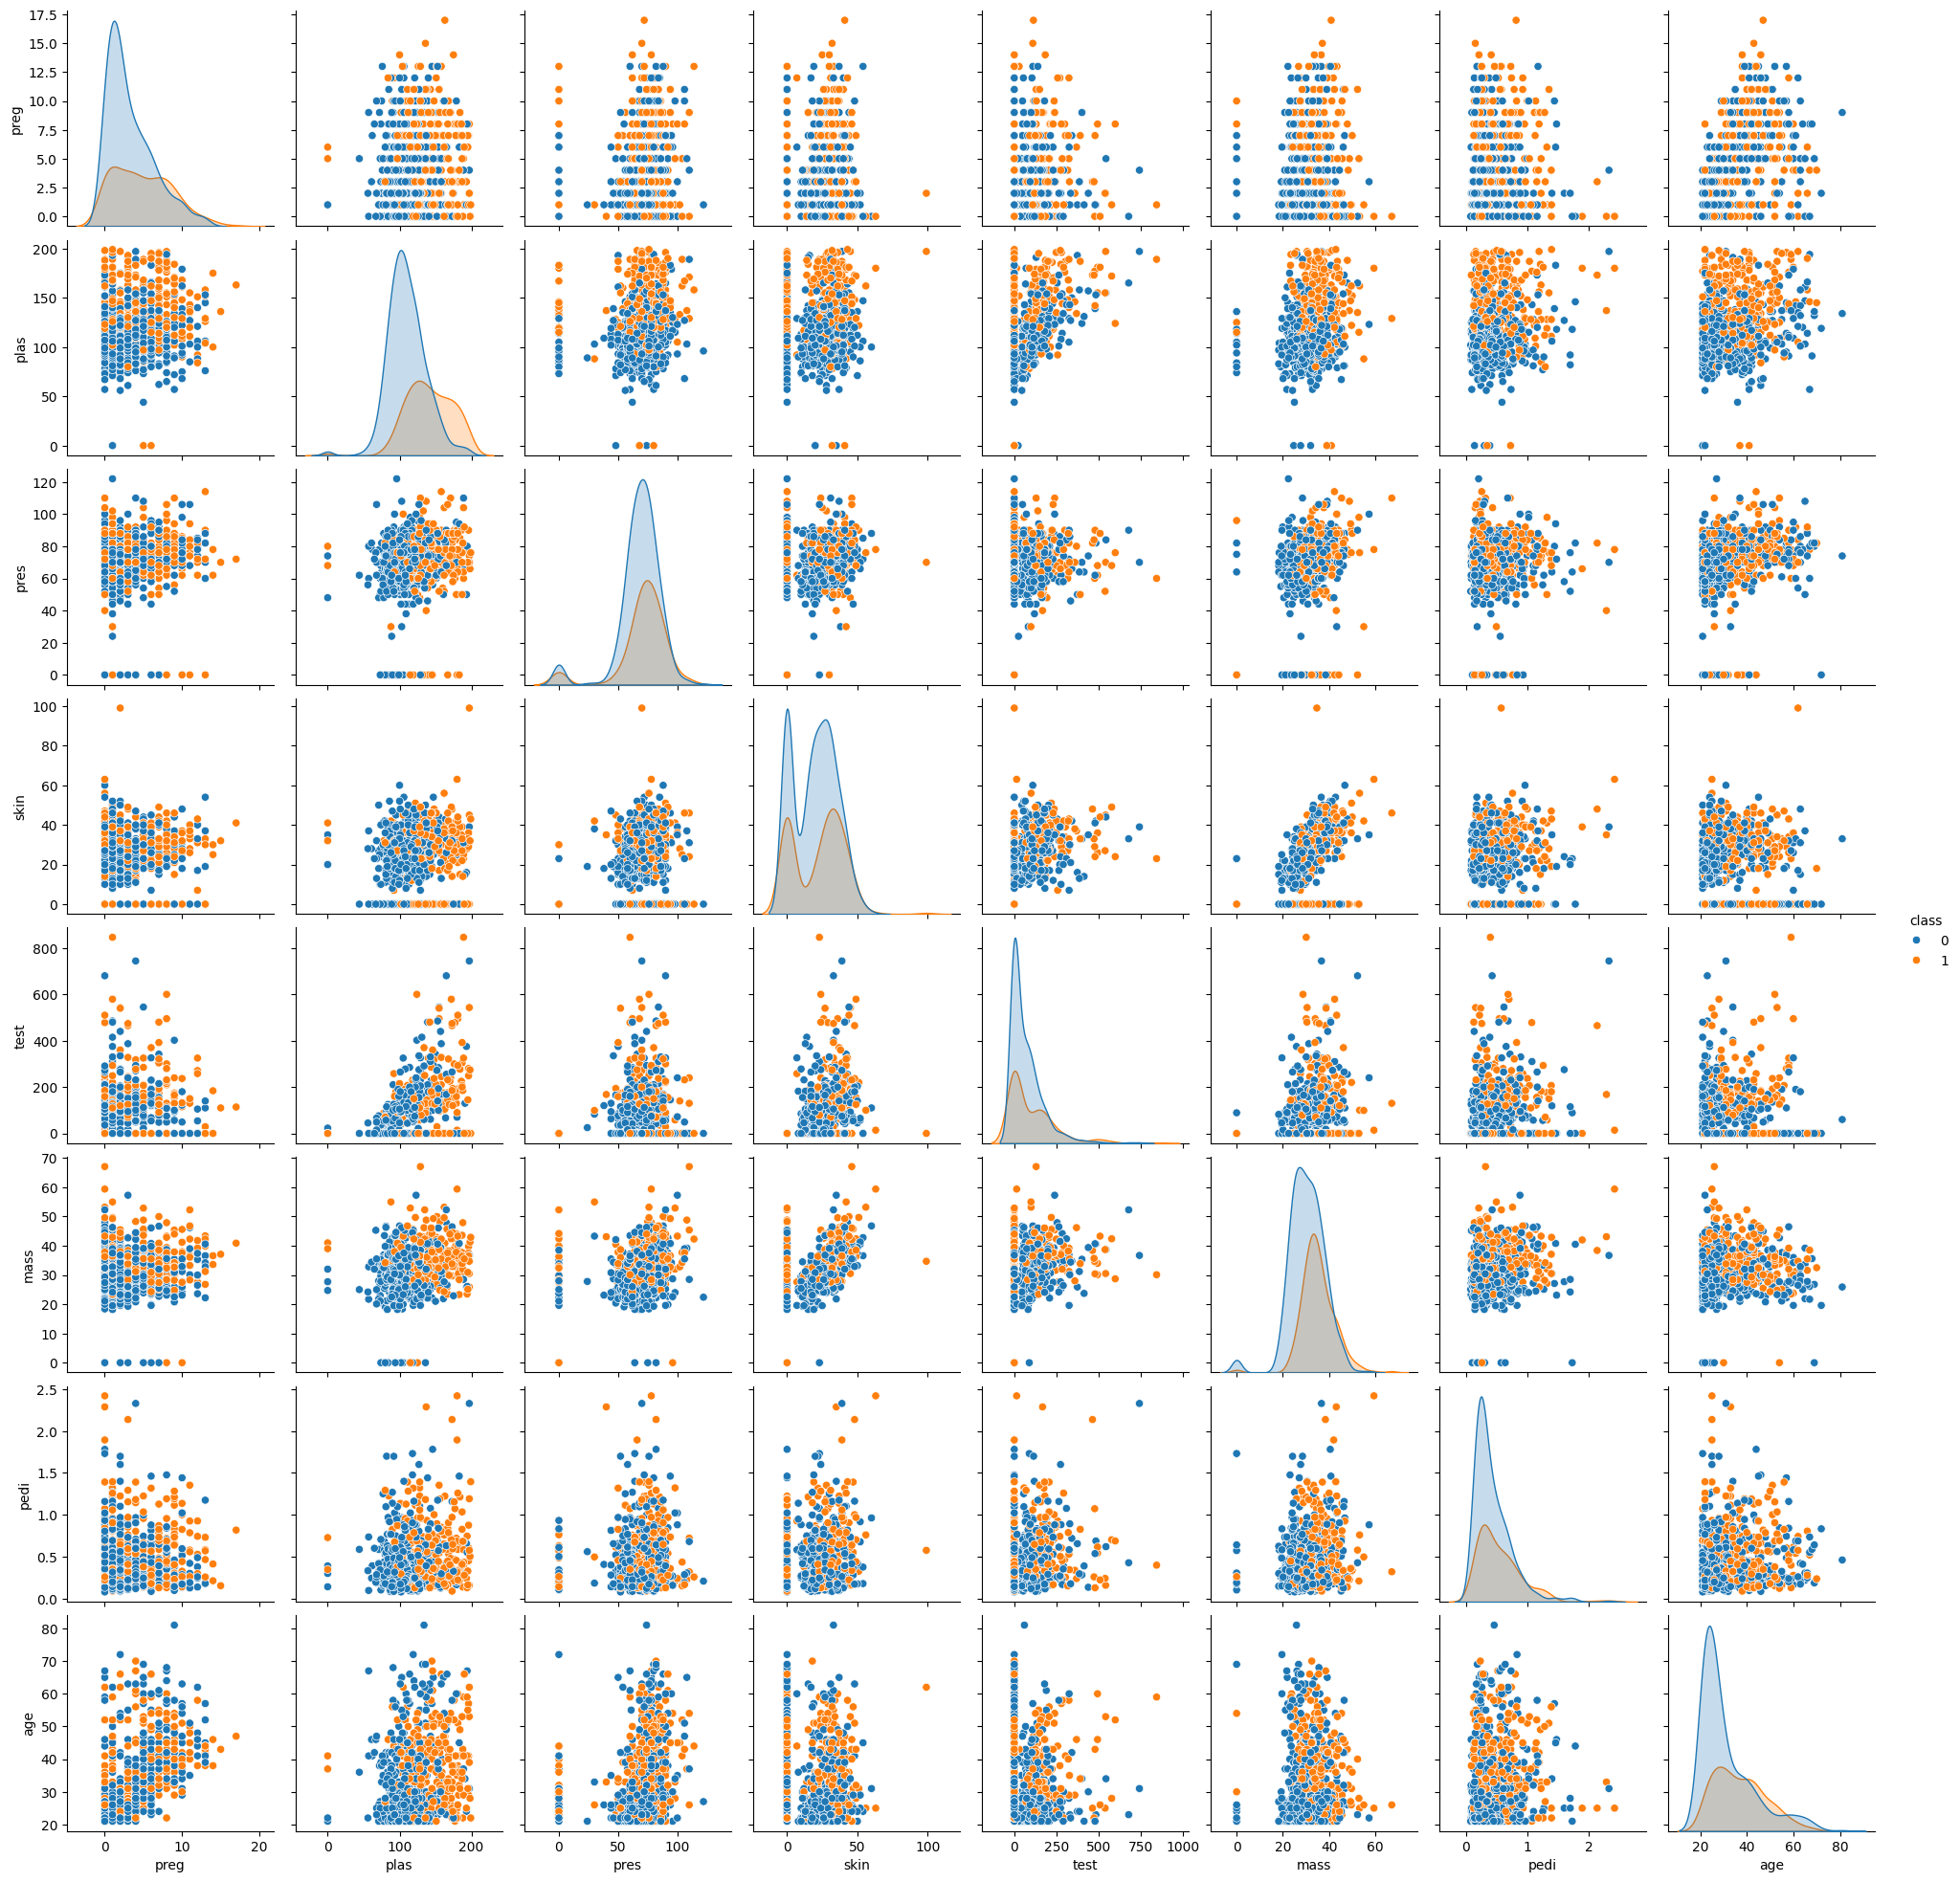

In [ ]:
# Pairplot using sns

sns.pairplot(pima_df , hue='class' , diag_kind = 'kde')

In [ ]:
#data for all the attributes are skewed, especially for the variable "test"

#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right


In [ ]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.


In [ ]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [ ]:
# y_test.value_counts()

In [ ]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict = model.predict(X_test)


In [ ]:
model_score_test = model.score(X_test, y_test)
model_score_train = model.score(X_train, y_train)


In [ ]:
print(model_score_test)
print(model_score_train)

print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.7619047619047619
0.7877094972067039
[[131  16]
 [ 39  45]]
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       147
         1.0       0.74      0.54      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['NonDiabetic', 'Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

The matrix provided is a classification report from logistic regression on the Pima Indians dataset, which contains metrics such as **precision**, **recall**, **F1-score**, and **support** for each class (0.0 and 1.0), as well as overall metrics like **accuracy**, **macro average**, and **weighted average**. Here’s how to interpret each of these:

### Class-wise Metrics

The classification report provides these metrics for each class:

1. **Class 0.0 (Negative Class)**
   - **Precision (0.77)**: Out of all the instances predicted as class 0.0, 77% were actually class 0.0. This means that there is a 23% rate of false positives (instances wrongly classified as class 0.0).
   - **Recall (0.89)**: Out of all the actual instances of class 0.0, 89% were correctly identified by the model. This indicates that 11% of actual class 0.0 instances were missed (false negatives).
   - **F1-Score (0.83)**: The F1-score is the harmonic mean of precision and recall, which balances the two. A score of 0.83 suggests a good balance between precision and recall for class 0.0.
   - **Support (147)**: The number of actual instances of class 0.0 in the dataset.

2. **Class 1.0 (Positive Class)**
   - **Precision (0.74)**: Out of all the instances predicted as class 1.0, 74% were actually class 1.0. This means there is a 26% rate of false positives (instances wrongly classified as class 1.0).
   - **Recall (0.54)**: Out of all the actual instances of class 1.0, only 54% were correctly identified by the model. This is relatively low, indicating that 46% of actual class 1.0 instances were missed (false negatives).
   - **F1-Score (0.62)**: The F1-score is 0.62, which reflects a lower balance between precision and recall for class 1.0, largely due to the lower recall.
   - **Support (84)**: The number of actual instances of class 1.0 in the dataset.

### Overall Metrics

3. **Accuracy (0.76)**
   - **Accuracy** represents the proportion of total correct predictions (both class 0.0 and class 1.0) made by the model. Here, the accuracy is 76%, meaning that the model correctly predicts 76% of all instances.

4. **Macro Average**
   - **Macro Avg Precision (0.75)**: The arithmetic mean of precision for both classes (0.77 for class 0.0 and 0.74 for class 1.0). Macro average treats all classes equally, regardless of their support.
   - **Macro Avg Recall (0.71)**: The arithmetic mean of recall for both classes (0.89 for class 0.0 and 0.54 for class 1.0).
   - **Macro Avg F1-Score (0.72)**: The arithmetic mean of the F1-score for both classes.

5. **Weighted Average**
   - **Weighted Avg Precision (0.76)**: The precision averaged across both classes, weighted by the number of instances in each class. Since class 0.0 has more instances, its precision has a larger impact on this average.
   - **Weighted Avg Recall (0.76)**: The recall averaged across both classes, weighted by the number of instances in each class.
   - **Weighted Avg F1-Score (0.75)**: The F1-score averaged across both classes, weighted by the number of instances in each class.

### Interpretation Summary
- The model performs better at predicting the negative class (0.0) than the positive class (1.0), as seen by the higher precision, recall, and F1-score for class 0.0.
- The model's recall for class 1.0 (0.54) is relatively low, indicating it has difficulty identifying all true positives (instances of class 1.0).
- Overall, the accuracy is 76%, but this metric can be misleading if the dataset is imbalanced, which it is in this case (147 instances of class 0.0 vs. 84 instances of class 1.0).
- The weighted averages provide a more balanced view of the model's performance considering the imbalance in the dataset.

### Conclusion
The model is better at predicting the majority class (0.0) but struggles with the minority class (1.0), especially in terms of recall. Further steps could involve using techniques like oversampling, undersampling, or tuning the model to better handle class imbalance.

In [ ]:

X = pima_df.iloc[:,0:7] # select all rows and first 8 columns which are the attributes
Y = pima_df.iloc[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

In [ ]:
import statsmodels.api as sm

X_train = X_train.apply(lambda x: x.fillna(x.median()),axis=1)

mdl = sm.MNLogit(y_train, X_train).fit()

print(mdl.summary())